# 6.S083 / 18.S190 Problem set 2: Probability and modelling recovery

## Submission deadline: 11:59pm on Tuesday, April 14


In this problem set we will look at probability distributions and how to model recovery from an infection.

Note: If you are unable to get `Interact.jl` to work to create interactive visualizations, note this fact on your pset submission. Where it says to create an interactive visualization, instead write a function that creates one of the plots, and run that function for different parameter values manually, showing the resulting plots.

Similarly, if you have problems running simulations for larger values of the parameters, just do what you can and make a note.

## Exercise 1: Frequencies

In this exercise we will write a more general function to
count occurrences of values in a set of data. In class we used
as `Vector`, but that is difficult to use with data that jumps around a lot.

1. Write a function `counts` that accepts a vector `data` and calculates the number of times each value in `data` occurs.

    To do so, use a **dictionary** called `counts`.  
    A dictionary maps a **key** to a **value**.
    We want to map integers to integers, so we create an empty dictionary with

    ```jl
    d = Dict{Int, Int}()
    ```

    Use the `haskey` function to find out whether the `Dict` contains a given key or not.

    Use indexing to add a new (key, value) pair, or to retrieve a value:

    ```jl
    d[3] = 1
    d[3]
    ```

    The function should return the dictionary.

2. Test that your code is correct by applying it to obtain the counts of the data vector `vv = [1, 0, 1, 0, 1000, 1, 1, 1000]`. What
should the result be?


The dictionary contains the information as a sequence of **pairs** mapping keys to values. This is not a particularly useful form for us. Instead we would prefer a vector of the keys and a vector of the values, sorted in order of the key.

Make a new version of the `counts` function where you do the following (below). Start off by just running the following commands each in their own cell on the dictionary you got by running the previous `counts` function on the vector `vv` so that you see the result of running each command. Once you have understood what's happening at *each* step, add them to the `counts` function in a new cell.

3. Extract vectors `ks` of keys and `vs` of values using the `keys()` and `values()` functions and convert the results into a vector using the `collect` function.

4. Define a variable `p` as the result of running the `sortperm` on the keys. This gives a **permutation** that tells you in which order you need to take the keys to give a sorted version.

5. Use indexing `ks[p]` to return the sorted keys and values vectors.  

    [Here we are passing in a *vector* as the index. Julia extracts the values at the indices given in that vector]

6. Test that your new `counts` function gives the correct result for the vector `v` by comparing it to the true result (that you get by doing the counting by hand!)

7. Make a function `probability_distribution` that normalizes the result of `counts` to calculate the relative frequency, i.e. to give a probability distribution (i.e. such that the sum of the resulting vector is 1).

    The function should return the keys (the unique data that was in the original data set, as calculated in `counts`, and the probabilities (relative frequencies).

    Test that it gives the correct result for the vector `vv`.

    We will use this function in the rest of the exercises.

In [1]:
function counts(data)
    counts = Dict{Int, Int}()
    for element in data
        if !haskey(counts, element)
            counts[element] = 1
        else
            counts[element] += 1
        end
    end
    return counts
end

counts (generic function with 1 method)

In [2]:
vv = [1, 0, 1, 0, 1000, 1, 1, 1000]

counts_vv = counts(vv)

Dict{Int64,Int64} with 3 entries:
  0    => 2
  1000 => 2
  1    => 4

In [3]:
ks = collect(keys(counts_vv))

3-element Array{Int64,1}:
    0
 1000
    1

In [4]:
vs = collect(values(counts_vv))

3-element Array{Int64,1}:
 2
 2
 4

In [5]:
p = sortperm(ks)

3-element Array{Int64,1}:
 1
 3
 2

In [6]:
ks = ks[p]
vs = vs[p]

3-element Array{Int64,1}:
 2
 4
 2

In [7]:
function counts(data)
    counts = Dict{Int, Int}()
    for element in data
        if !haskey(counts, element)
            counts[element] = 1
        else
            counts[element] += 1
        end
    end
    
    ks = collect(keys(counts))
    vs = collect(values(counts))
    
    p = sortperm(ks)
    
    ks = ks[p]
    vs = vs[p]
    
    return ks, vs
end

counts (generic function with 1 method)

In [8]:
ks , vs = counts(vv)

([0, 1, 1000], [2, 4, 2])

In [9]:
function probability_distribution(data)
    ks, vs = counts(data)
    probabilities = vs ./ sum(vs)
    return ks, probabilities
end

probability_distribution (generic function with 1 method)

In [10]:
probability_distribution(vv)

([0, 1, 1000], [0.25, 0.5, 0.25])

### Exercise 2: Modelling recovery

In this exercise, we will investigate the simple model of recovery from an infection that was described in lectures. We
want to study the time $\tau$ to recover.

In this model, an individual who is infected has probability $p$ to recover each day. If they recover on day $n$ then $\tau = n$.
We see that $\tau$ is a random variable, so we need to study its **probability distribution**.

1. Define the function `bernoulli(p)` from lectures. Recall that this generates `true` with probability $p$ and `false` with probability $(1 - p)$.

2. Write a function `geometric(p)`. This should run a simulation with probability $p$ to recover and wait *until* the individual recovers, at which point it returns the time taken to recover.

3. Write a function `experiment(p, N)` that runs the function from [2] `N` times and collects the results into a vector.

4. Run an experiment with $p=0.25$ and $N=10,000$. Plot the resulting probability distribution, i.e. plot $P(\tau = n)$ against $n$, where $n$ is the recovery time.

5. Calculate the mean recovery time and add it to the plot using the `vline!()` function and the `ls=:dash` argument to make a dashed line.

    Note that `vline!` requires a *vector* of values where you wish to draw vertical lines.

6. What shape does the distribution seem to have? Can you verify that by using one or more log scales?

7. Write an interactive visualization that repeats [4] for $p$ varying between $0$ and $1$ and $N$ between $0$ and $100,000$.

    As you vary $p$, what do you observe? Does that make sense?

    Note that you can make a range for $p$ using something like `0:0.01:1.0`, and you can make a `@manipulate` with additional sliders using a double `for` loop: `for a in 1:10, b in 1:10`.

8. Fix $N = 10,000$ and calculate the *mean* time $\langle \tau(p) \rangle$ to recover. Plot this as a function of $p$.
Can you find the relationship between the two quantities?

In [11]:
function bernoulli(p)
    """Returns `true` with probability `p` 
    and `false` with probability `1 - p`"""
    return rand() < p
end

bernoulli (generic function with 1 method)

In [12]:
function geometric(p)
    """Runs simulation with probability `p` to recover
    and returns time taken to recover`"""
    τ = 1
    while !bernoulli(p)
        τ += 1
    end
    return τ
end

geometric (generic function with 1 method)

In [13]:
geometric(0.25)

2

In [14]:
function experiment(p, N)
    """Runs simulation with probability `p` to recover
    N times and returns vector of times taken to recover`"""
    τs = [geometric(p) for i in 1:N]
    return τs
end    

experiment (generic function with 1 method)

In [15]:
using Plots

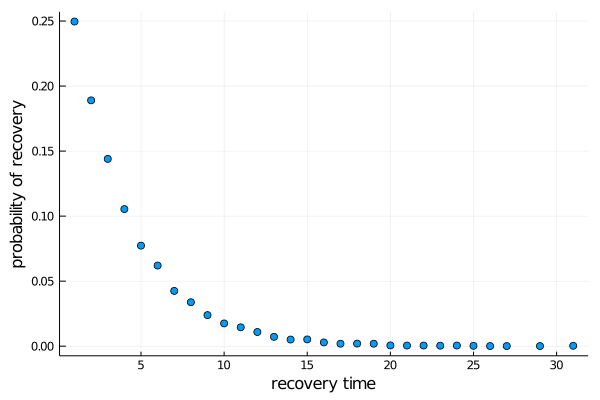

In [16]:
p = 0.25
N = 10000

τs = experiment(p, N)

prob = probability_distribution(τs)

prob_plot = scatter(prob, leg=:false)
xlabel!("recovery time")
ylabel!("probability of recovery")

In [17]:
using StatsBase

In [18]:
mean_τ = mean(τs)

3.9615

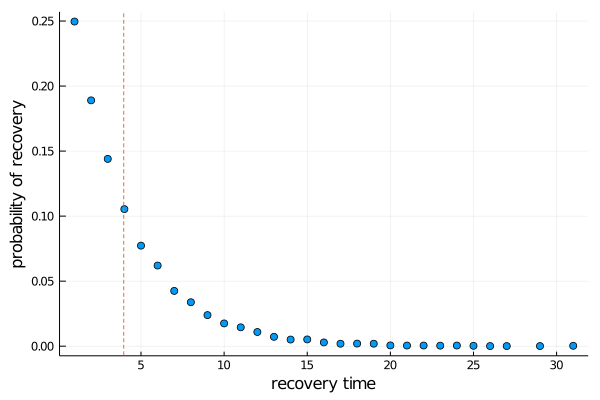

In [19]:
vline!([mean_τ], ls=:dash)

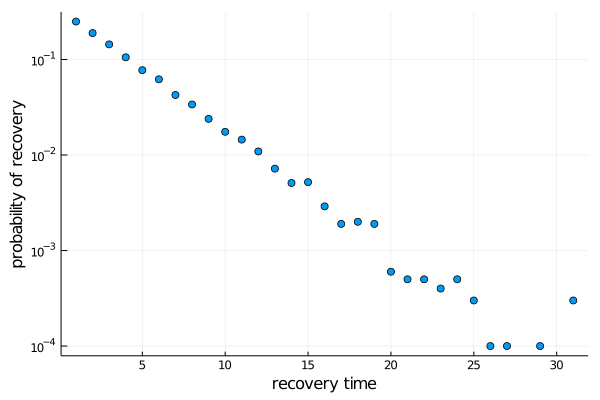

In [20]:
scatter(prob, leg=:false, yaxis=:log, xlabel="recovery time", ylabel="probability of recovery")

In [21]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16445801491959158900\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9721116603514689548\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16445801491959158900\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [22]:
@manipulate for p in slider(0.01:0.01:1.0, value=0.25), N in slider(0:1000:100000, value=10000)
    
    τs = experiment(p, N)
    prob = probability_distribution(τs)
    
    scatter(prob, leg=:false, xlabel="recovery time", ylabel="probability of recovery")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
25, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/work/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/work/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/work/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/work/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/work/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000132f18d90, Task (runnable) @0x0000000132f18d90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\"0.28\",

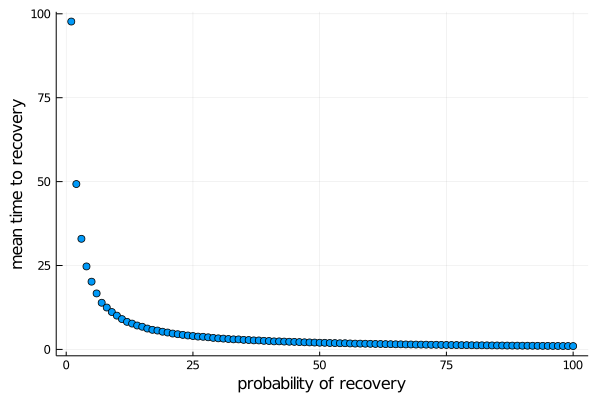

In [23]:
N = 10000
mean_τs = [mean(experiment(p, N)) for p in 0.01:0.01:1.0]

scatter(mean_τs, xlabel="probability of recovery", ylabel="mean time to recovery", leg=:false)

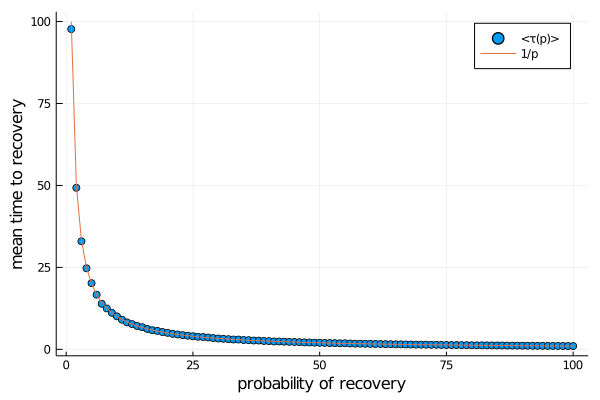

In [24]:
theor = [1 / p for p in 0.01:0.01:1.0]

scatter(mean_τs, label="<τ(p)>")
plot!(theor, label="1/p")
xlabel!("probability of recovery")
ylabel!("mean time to recovery")

In [25]:
@manipulate for N in slider(0:1000:100000, value=10000)
    
    mean_τs = [mean(experiment(p, N)) for p in 0.01:0.01:1.0]
    scatter(mean_τs, label="<τ(p)>")
    
    theor = [1 / p for p in 0.01:0.01:1.0]
    plot!(theor, label="1/p")
    xlabel!("probability of recovery")
    ylabel!("mean time to recovery")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 101,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/work/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/work/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/work/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/work/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/work/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000132f10010, Task (runnable) @0x0000000132f10010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1000\",\"2000\",\"3000\",\"4000\",\"5000\",\"6000\",\"7000\",\"8000\",\"9000\",\"10000\",\"11000\",\"12000\",\"13000\",\"14000\",\"15000\",\"16000\",\"17000\",\"18000\",\"19000\",\"20000\",\"21000\",\"22000\",\"23000\",\"24000\",\"25000\",\"2

### Exercise 3: More efficient geometric distributions

Let's use the notation $P_n := \mathbb{P}(\tau = n)$ for the probability to recover on the $n$th step.

Probability theory tells us that in the limit of an infinite number of trials, we have the exact results $P_1 = p$, that $P_2 = p (1-p)$, and in general $P_n = p (1 - p)^{n-1}$.

1. Fix $p = 0.25$. Make a vector of the values $P_n$ for $n=1, \dots, 50$. You must use a loop or similar construction; do *not* do this by hand!

2. Plot $P_n$ as a function of $n$. Compare it to the result from the previous exercise (i.e. plot them both on the same graph).

    How could we measure the *error*, i.e. the distance between the two graphs? What do you think determines it?


If $p$ is *small*, say $p=0.001$, then the algorithm we used in
Exercise 2 to sample from geometric distribution will be very slow, since it just sits there calculating a lot of `false`s!
(The average amount of time taken is what you hopefully found in [1.8])

Let's make a better algorithm. Think of each probability $P_n$ as a "bin" of length $P_n$. If we lay those bins next to each other starting from $P_1$ on the left, then $P_2$, etc., there will be an *infinite* number of bins filling up the interval between $0$ and $1$. (In principle there is no upper limit on how many days it will take to recover, although the probability becomes *very* small.)

Now suppose we take a uniform random number $r$ between $0$ and $1$. That will fall into one of the bins. If it falls into the bin corresponding to $P_n$, then we return $n$ as the recovery time!

3. To draw this picture, we need to add up the lengths of the lines from 1 to $n$ for each $n$, i.e. calculate the **cumulative sum**. Write a function `cumulative_sum`, which returns a new vector. (Of course, you should only do this for a finite number of values! Say those that you found in [2]. )

4. Plot the resulting values on a horizontal line. Generate a few random points and plot those. Convince yourself that the probability that a point hits a bin is equal to the length of that bin.

5. Calculate analytically the sum of $P_1$ up to $P_n$. (Hint: This should be a calculation that you did in high school or in Calculus I.)

6. Use the result of [5] to find analytically which bin $n$ a given value of $r \in [0, 1]$ falls into using the inequality $P_{n+1} \le r \le P_n$.

7. Implement this using the `floor` function.

In [26]:
p = 0.25
num_steps= 50

function analytical_probabilities(p, num_steps)
    Ps = [p * (1 - p) ^ (n - 1) for n in 1:num_steps]
    return Ps
end

Ps = analytical_probabilities(p, num_steps)

50-element Array{Float64,1}:
 0.25
 0.1875
 0.140625
 0.10546875
 0.0791015625
 0.059326171875
 0.04449462890625
 0.0333709716796875
 0.025028228759765625
 0.01877117156982422
 0.014078378677368164
 0.010558784008026123
 0.007919088006019592
 ⋮
 4.4695934051722205e-6
 3.3521950538791656e-6
 2.514146290409374e-6
 1.8856097178070307e-6
 1.414207288355273e-6
 1.0606554662664546e-6
 7.95491599699841e-7
 5.966186997748808e-7
 4.474640248311606e-7
 3.3559801862337043e-7
 2.5169851396752785e-7
 1.8877388547564587e-7

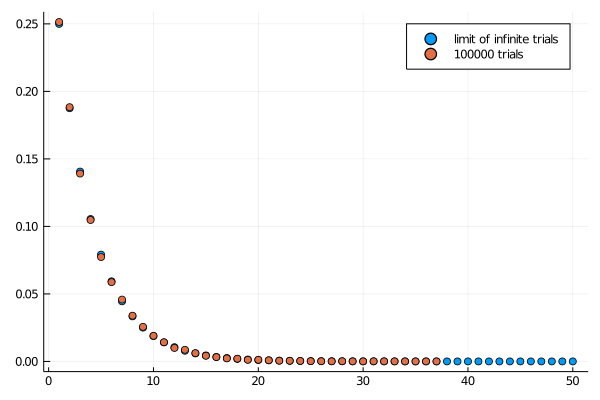

In [27]:
scatter(Ps, label="limit of infinite trials")

N = 100000
τs = experiment(p, N)
prob = probability_distribution(τs)
scatter!(prob, label="$N trials")

In [28]:
cumulative_sum = [sum(Ps[1:n]) for n in 1:num_steps]

50-element Array{Float64,1}:
 0.25
 0.4375
 0.578125
 0.68359375
 0.7626953125
 0.822021484375
 0.86651611328125
 0.8998870849609375
 0.9249153137207031
 0.9436864852905273
 0.9577648639678955
 0.9683236479759216
 0.9762427359819412
 ⋮
 0.9999865912197845
 0.9999899434148384
 0.9999924575611288
 0.9999943431708466
 0.999995757378135
 0.9999968180336012
 0.9999976135252009
 0.9999982101439007
 0.9999986576079255
 0.9999989932059441
 0.999999244904458
 0.9999994336783435

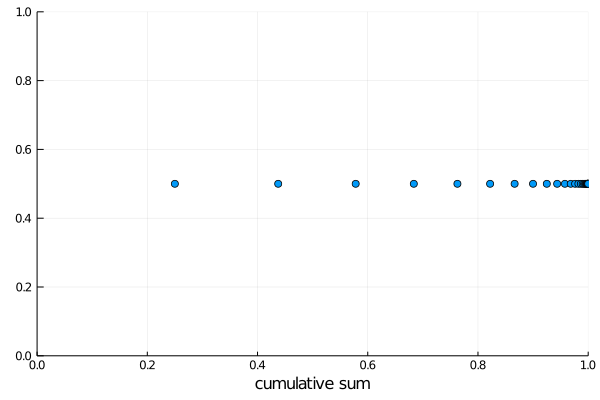

In [29]:
scatter(cumulative_sum, 0.5 * one.(cumulative_sum), xlim=(0,1), ylim=(0,1), xlabel="cumulative sum", leg=:false)

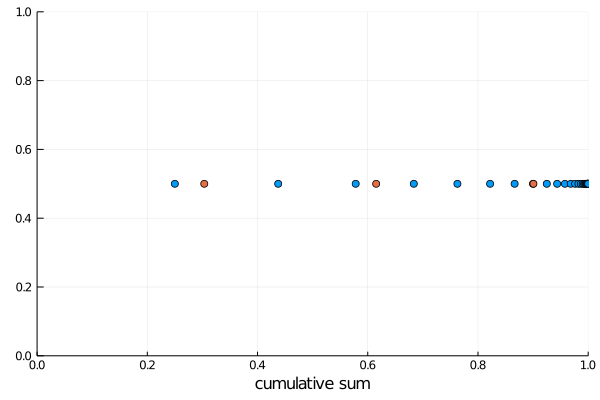

In [30]:
random_pts = [rand() for i in 1:3]
scatter!(random_pts, 0.5 * one.(random_pts))

In [31]:
random_pts

3-element Array{Float64,1}:
 0.900616889919043
 0.6152732754786372
 0.30335342383123853

$$P_n = p(1-p)^{n-1}$$

$$\mathcal{S}_N = \sum_{n=1}^{N} p(1-p)^{n-1} \\
= p\sum_{n=1}^{N} (1-p)^{n-1} \\
$$

$$ \mathcal{S}_N * (1 - p) - \mathcal{S}_N = p(1-p)^N - p(1-p)^0 \\
= p(1-p)^N - p$$

$$\implies \mathcal{S}_N = 1 - (1-p)^N$$

In [32]:
function τ(r, p=0.25)
    """Determines which bin `n` a given value
    of r in [0,1] falls into"""
    return ceil(Int, log(1-r) / log(1-p))
end

τ (generic function with 2 methods)

In [33]:
τs = [τ(random_pts[i]) for i in 1:length(random_pts)]

3-element Array{Int64,1}:
 9
 4
 2

### Exercise 4: A simple infection model

In this exercise we will investigate a *highly* simplified model of the process of infection and recovery.  (In the next problem set we will develop a much better model.)

The model is as follows: An individual starts in state `S` ("susceptible"). When they are in state `S`, they have a probability $p_E$ to become exposed (state `E`) at each step. Once they are exposed, they have probability $p_I$ to become infectious (state `I`). When they are infectious, they have a probability $p_R$ to recover at each step.

Let's denote by $\tau_S$ the length of time spent in state `S`, and similarly for $\tau_E$ and $\tau_I$.

1. How does the total time $\tau_\text{total}$ to go from `S` to `R` relate to these times? What is the relation with the geometric random variables from the previous exercises?

2. Write a function `total_time(p_E, p_I, p_R)` that calculates the total time to go from state `S` to state `R`.

3. Run a Monte Carlo simulation to calculate and plot the probability distribution of $\tau_\text{total}$ for $p_E = 0.25$, $p_I = 0.1$ and $p_R = 0.05$.  

4. What happens to the probability distribution of the total time as you add more states, say `E_1`, `E_2`? You may suppose that the probability to move to the next state is the same value $p$ for all states. How could you use $s$ such states?

    [This is a visual representation of a famous theorem that we will discuss in class.]

5. **Extra credit:** Write a simulation that runs $N$ individuals and keeps track at each step of how many people are in which state. Plot the resulting graph of the number of people in the `S`,  `I`, `E` and `R` states as a function of time.

$\tau_\text{total} = \tau_S + \tau_E + \tau_I$

In [34]:
function total_time(p_E, p_I, p_R)
    """Calculates total time to go from susceptible to 
    exposed to infected to recovered"""
    
    total_time = τ(rand(), p_E) + τ(rand(), p_I) + τ(rand(), p_R)
    
    return total_time
end

total_time (generic function with 1 method)

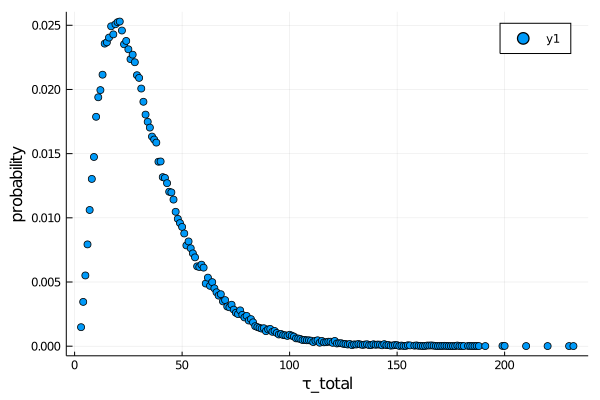

In [35]:
N = 100000

p_E = 0.25
p_I = 0.1
p_R = 0.05

total_times = [total_time(p_E, p_I, p_R) for i in 1:N]
probs = probability_distribution(total_times)

scatter(probs)
xlabel!("τ_total")
ylabel!("probability")

In [36]:
function total_time_n_states(n, p)
    """Calculates the total time to move through n states
    with probability of transition p"""
    
    total_time = 0
    
    for i in 1:n
        total_time += τ(rand(), p)
    end
    
    return total_time
end

total_time_n_states (generic function with 1 method)

In [37]:
num_states = 100
num_trials =10000

@manipulate for n in slider(1:num_states, value=1), p in slider(0.01:0.01:1, value=0.01)
    total_times = [total_time_n_states(n, p) for i in 1:num_trials]
    probs = probability_distribution(total_times)
    
    scatter(probs)
    xlabel!("τ_total")
    ylabel!("probability")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/work/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/work/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/work/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/work/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/work/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000132ebef50, Task (runnable) @0x0000000132ebef50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\"

In [44]:
p_E = 0.25
p_I = 0.1
p_R = 0.05

num_individuals = 1000


# time to exposed
τ_Es = [τ(rand(), p_E) for i in 1:num_individuals]

# time to infected
τ_Is = [τ(rand(), p_I) for i in 1:num_individuals]

# time to recovered
τ_Rs = [τ(rand(), p_R) for i in 1:num_individuals];

In [45]:
[τ_Es, τ_Is, τ_Rs]

3-element Array{Array{Int64,1},1}:
 [4, 7, 12, 2, 12, 12, 2, 2, 6, 11  …  3, 8, 2, 2, 2, 7, 4, 1, 5, 2]
 [21, 6, 24, 23, 2, 3, 23, 7, 2, 29  …  17, 34, 12, 14, 5, 13, 21, 11, 8, 10]
 [31, 8, 38, 40, 51, 29, 1, 135, 48, 55  …  12, 19, 8, 3, 31, 2, 14, 2, 2, 3]

In [46]:
cum_τ_Is = τ_Es .+ τ_Is

1000-element Array{Int64,1}:
 25
 13
 36
 25
 14
 15
 25
  9
  8
 40
  6
  7
 10
  ⋮
  5
 21
 20
 42
 14
 16
  7
 20
 25
 12
 13
 12

In [47]:
cum_τ_Rs = cum_τ_Is .+ τ_Rs

1000-element Array{Int64,1}:
  56
  21
  74
  65
  65
  44
  26
 144
  56
  95
  18
  11
  35
   ⋮
  13
  39
  32
  61
  22
  19
  38
  22
  39
  14
  15
  15

In [48]:
max_time = maximum(cum_τ_Rs)

S = num_individuals
E = 0
I = 0
R = 0

Ss = zeros(Int, max_time)
Es = zeros(Int, max_time)
Is = zeros(Int, max_time)
Rs = zeros(Int, max_time)

for time in 1:max_time
    for individual in 1:num_individuals
        if τ_Es[individual] == time
            S -= 1
            E += 1
        elseif cum_τ_Is[individual] == time 
            E -= 1
            I += 1
        elseif cum_τ_Rs[individual] == time
            I -= 1
            R += 1
        end
    end
    
    Ss[time] = S
    Es[time] = E
    Is[time] = I
    Rs[time] = R
end
            

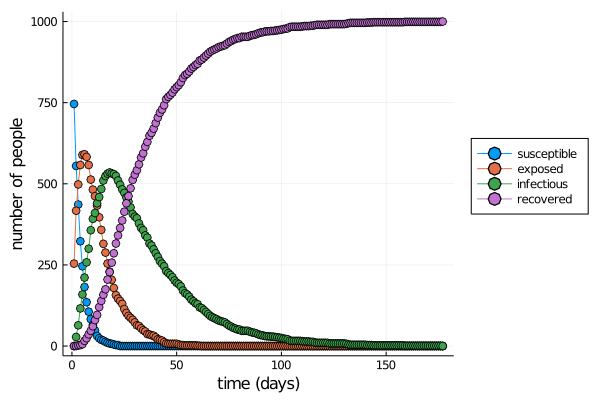

In [50]:
plot(Ss, marker=:o, label="susceptible", leg=:outerright)
plot!(Es, marker=:o, label="exposed")
plot!(Is, marker=:o, label="infectious")
plot!(Rs, marker=:o, label="recovered")
xlabel!("time (days)")
ylabel!("number of people")